In [2]:
%matplotlib inline
# fix DPI issues on mac
%config InlineBackend.figure_format = 'retina'
 # autoreload workflow, reload modules every time cell is run
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import matplotlib.pyplot as plt
default_color_list = plt.rcParams['axes.prop_cycle'].by_key()['color'] # get default colors
import matplotlib
matplotlib.rcParams['figure.figsize'] = 10,8 # have to fix figure size due to backend
from astropy.io import ascii   
from scipy.special import erf

In [4]:
# default_names = ['i', 'x1v', 'rho', 'press', 'vel1', 'vel2', 'vel3', 'Er', 
#                  'Fr1', 'Fr2', 'Fr3', 'Pr', 'Er0', 'Fr01', 'Fr02', 'Fr03', 
#                  'Sigma_s', 'Sigma_a', 'Sigma_p']
# dummies = ['dum%d' % i for i in range(27-len(default_names))]

In [5]:
default_names = ['i', 'x1v', 'rho', 'Pres', 'vel1', 'vel2', 'vel3']
dummies = []

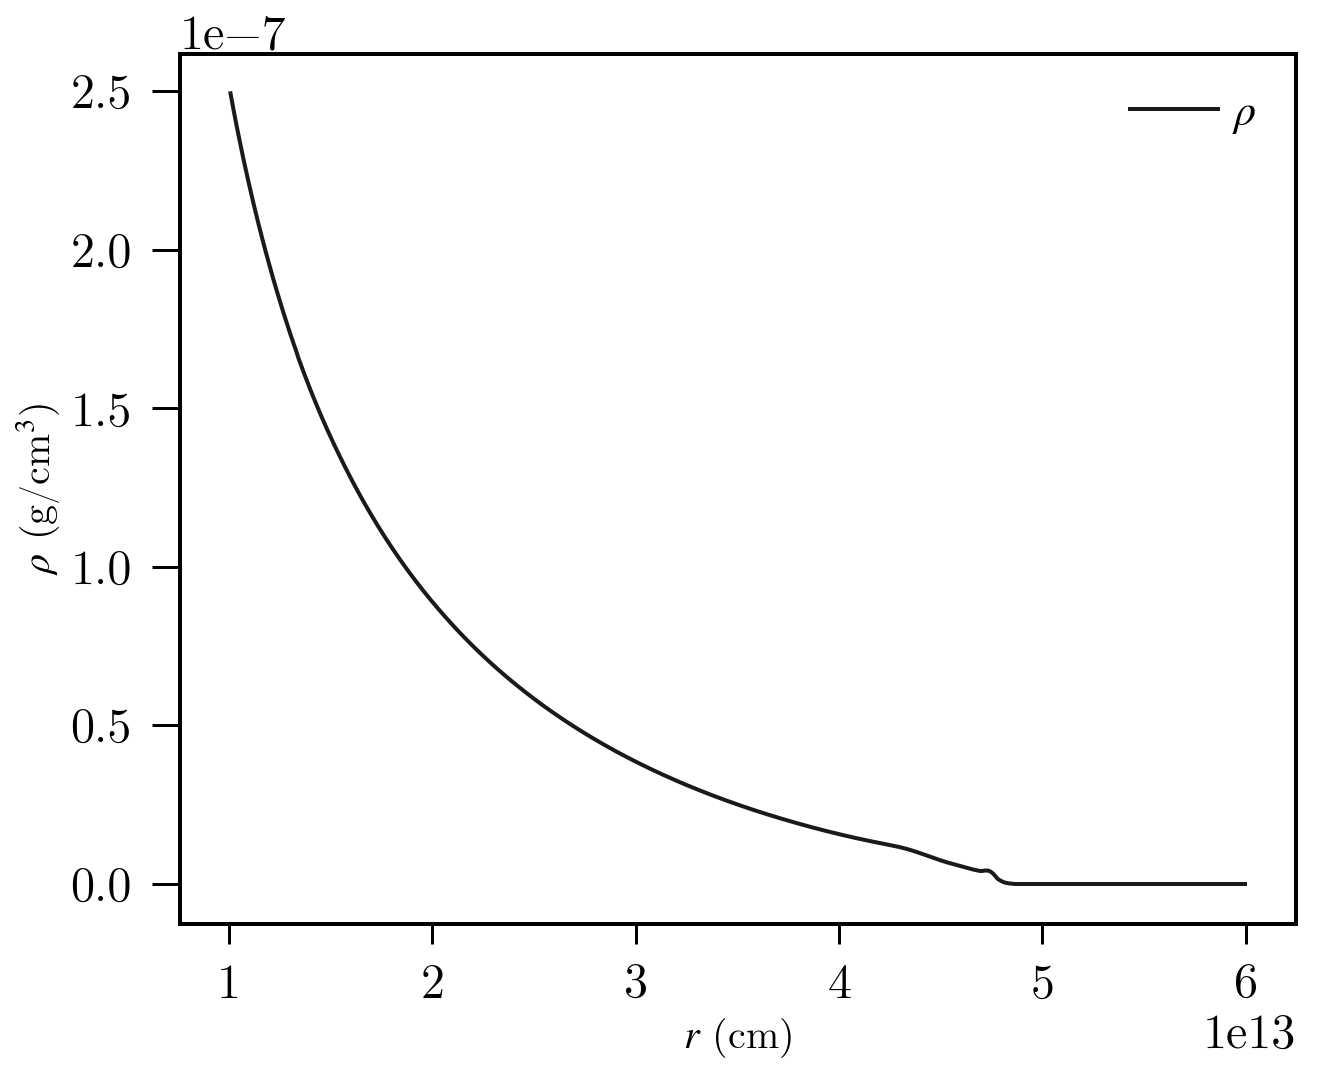

In [32]:
data1 = ascii.read("./SN.block0.out3.00000.tab",
                   format='no_header', data_start=2,
                  names= default_names+dummies)  

src1 = ascii.read("./SN.block0.out4.00000.tab",
                   format='no_header', data_start=2,
                  names= default_names+dummies) 

# data1.colnames
plt.plot( data1['x1v'], data1['rho'], label=r'$\rho$' )


plt.ylabel(r'$\rho$ (g/cm$^3$)')
plt.xlabel(r'$r$ (cm)')
plt.legend()
# plt.yscale('log')

In [16]:
from matplotlib import animation, rc
from IPython.display import HTML

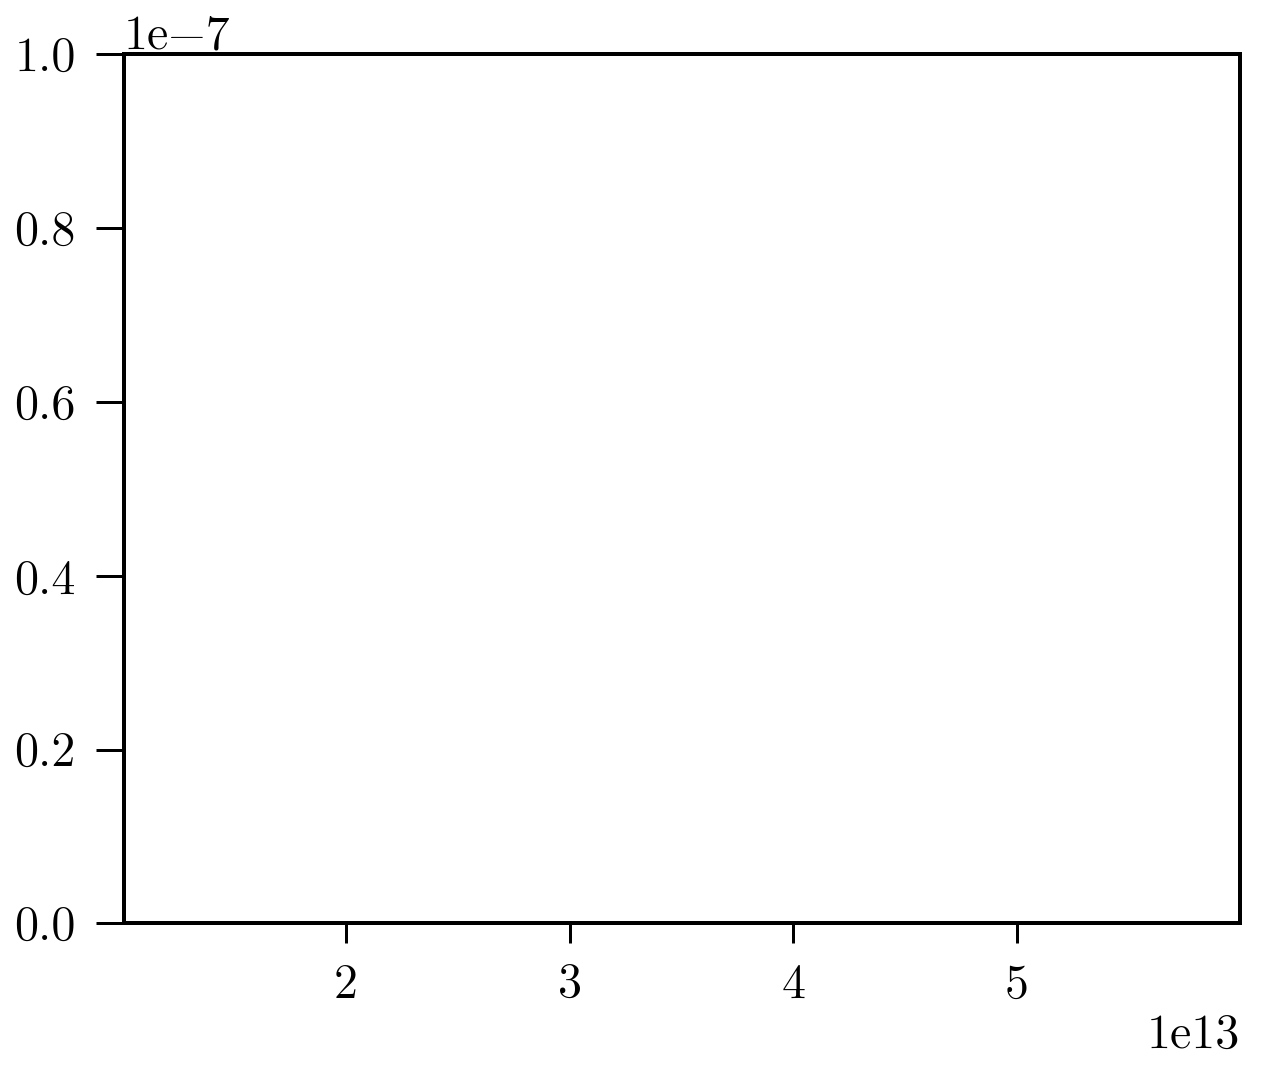

In [52]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( np.min(data1['x1v']), np.max(data1['x1v'])))
ax.set_ylim((1e-15,1e-7))
# ax.set_yscale('log')

line, = ax.plot([], [], lw=2)

In [53]:
# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

In [56]:
# animation function. This is called sequentially
def animate(i):
    datai = ascii.read('./SN.block0.out3.' + str(i).zfill(5) + '.tab',
                   format='no_header', data_start=2,
                  names= default_names+dummies)  
    line.set_data(datai['x1v'], datai['rho'])
    return (line,)

In [59]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=50, interval=20, blit=True)
HTML(anim.to_html5_video())